# E-tivity 2 (06/02/23 - 19/02/23)

* Your Name: Eoghan O'Connor

* Your Student ID: 16110625

## Outline

This e-tivity is split into two parts. The first part <a href="#part1">**Stock Predicition**</a> is a group activity where you are tasked with predicting the stock market.

The second <a href="#part2">**Sentiment Analysis**</a> is an individual task, the problem is to predict if a film review is positive or negative.

### Guidelines

The e-tivity is split into five tasks. The first four are "group" excersises, in that you post the solutions to Tasks 1-4 to Gitlab. This will allow the members of your group to send you feedback (via the forums) so you can improve your submission. The final task is an individual task and together with the other tasks, should be uploaded to Sulis but not to gitlab.

Marks will be deducted if task 5 is posted to gitlab in contravention of instructions. Also if the the final submission is not a single notebook with tasks 1-5 and with correct identification or filename.


Grading guidelines: the grades for each task are additive, max 20. Weight [5/7]

**Task 1 [0-6]**: Complete with suitable preprocessing steps. There is no unique solution but you should justify the actions you are taking.

**Task 2 [0-4]**: Complete with suitable treatment of missing values. Again there maybe more than one solution, the important thing is to justify your actions.

**Tasks 3+4 [0-4]**: Create a suitable model with correct evaluation. Test for common DL issues.

**Task 5 [0-6]**: Completion of Task 5, using the layers outlined. The purpose of the task is to demonstrate that you can construct a valid model from scratch. Direct copy and paste from the web is not acceptable.

In [ ]:
import matplotlib.pyplot as plt

import numpy as np

import pandas as pd
import seaborn as sn
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Input, SimpleRNN, Dropout
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras import regularizers

<a id='part1'></a>
## Stock Prediction

### Context

There is a small dataset of real stock prices for each working day from the end of 2015 to the end of 2019. There are four variables (with a time stamp), stock price, oil price, gold price and Euro to Dollar exchange. You need to predict the Stock price a day ahead from only the past values of each of the 4 variables. 


### Tasks 1-4 (complete by Monday 13/02/23)

These tasks are to be completed and uploaded to GitLab on which the other group members can comment. The forum activity will form part of the overall mark for the e-tivity.

**Task 1: data preprocessing**

Explain any preprocessing steps you take including but limited to reformatting and also how you have selected the training and test sets. The test set should be 20% of the whole.


In [ ]:
# from google.colab import files
# uploaded = files.upload()

Saving stock.csv to stock.csv


In [ ]:
 # Load the stock data
df = pd.read_csv("stock.csv")

# View the first 10 rows of the stock data
# We can see that there doesn't seem to be any weekend days in the data.
# 23-11-15 is a Monday the first thursday is missing.
df.head(20)

,Date,Stock,Oil,EuroToDollar,Gold
0,2015-11-23,2089.409912,41.490002,0.9432,1124.7
1,2015-11-24,2084.419922,42.040001,0.9388,1131.6
2,2015-11-25,2089.300049,42.689999,0.9420,1128.4
3,2015-11-27,2088.820068,43.250000,0.9438,1114.5
4,2015-11-30,2090.949951,41.770000,0.9468,1123.9
5,2015-12-01,2082.929932,41.730000,0.9416,1122.0
6,2015-12-02,2101.709961,41.689999,0.9458,1112.4
7,2015-12-03,2080.709961,40.150002,0.9173,1120.6
8,2015-12-04,2051.239990,41.310001,0.9188,1143.2
9,2015-12-07,2090.419922,40.099998,0.9225,1134.3


In [ ]:
#Viewing the data, no negative values!
df.describe()

,Stock,Oil,EuroToDollar,Gold
count,1033.000000,1023.000000,1021.000000,1033.000000
mean,2537.063011,53.655484,0.883818,1353.312488
std,338.853458,9.799842,0.034394,89.592361
min,1833.400024,27.299999,0.800800,1090.200000
25%,2204.969971,47.594999,0.859700,1303.800000
50%,2584.000000,53.049999,0.887900,1346.500000
75%,2811.350098,60.625000,0.904500,1403.900000
max,3247.229980,76.180000,0.963900,1584.500000


In [ ]:
# Checking types. Date is not a number.
df.dtypes

Date             object
Stock           float64
Oil             float64
EuroToDollar    float64
Gold            float64
dtype: object

In [ ]:
# Convert the 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Convert the 'Date' column to integers
df['Date'] = (df['Date'] - df['Date'].min()) / np.timedelta64(1,'D')
df['Date'] = df['Date'].astype(int)

In [ ]:
df.dtypes

Date              int64
Stock           float64
Oil             float64
EuroToDollar    float64
Gold            float64
dtype: object

In [ ]:
df.head(10)

,Date,Stock,Oil,EuroToDollar,Gold
0,0,2089.409912,41.490002,0.9432,1124.7
1,1,2084.419922,42.040001,0.9388,1131.6
2,2,2089.300049,42.689999,0.9420,1128.4
3,4,2088.820068,43.250000,0.9438,1114.5
4,7,2090.949951,41.770000,0.9468,1123.9
5,8,2082.929932,41.730000,0.9416,1122.0
6,9,2101.709961,41.689999,0.9458,1112.4
7,10,2080.709961,40.150002,0.9173,1120.6
8,11,2051.239990,41.310001,0.9188,1143.2
9,14,2090.419922,40.099998,0.9225,1134.3


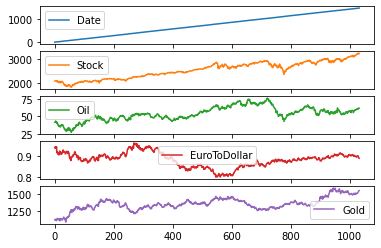

In [ ]:
ax = df.plot(subplots=True)

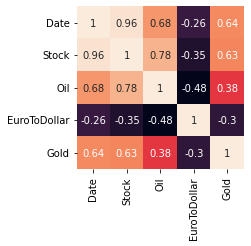

In [ ]:
plt.figure(figsize=(3, 3))
# checking correlation
sn.heatmap(df.corr(), annot=True, cbar=False)
plt.show()

In [ ]:
#EuroToDollar has a negative correlation to Stock. Dropping it
df = df.drop('EuroToDollar',axis=1)

In [ ]:
#Split the data 20% test
X_train, X_test = train_test_split(df,test_size=0.2, shuffle=False)

In [ ]:
 # Check for any NaN values
print(X_train.isna().sum())
print(X_test.isna().sum())

Date     0
Stock    0
Oil      7
Gold     0
dtype: int64
Date     0
Stock    0
Oil      3
Gold     0
dtype: int64


**Task 2: data cleaning**

There are a number of missing values in the data. Clean the data so that it is suitable for use with the NN. Bare in mind that you want to retain the time coherency of the data as much as possible.


In [ ]:
# Use linear interpolation to fill in any missing values
X_train = X_train.interpolate(method ='linear')
X_test = X_test.interpolate(method ='linear')

In [ ]:
 # Check for any NaN values
print(X_train.isna().sum())
print(X_test.isna().sum())

Date     0
Stock    0
Oil      0
Gold     0
dtype: int64
Date     0
Stock    0
Oil      0
Gold     0
dtype: int64


In [ ]:
# checking for duplicate days
print(df['Date'].duplicated().sum())

0


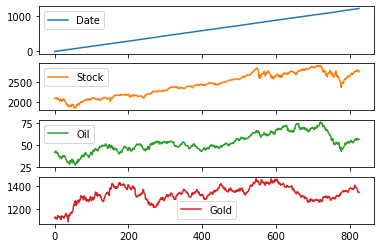

In [ ]:
# checking that it is in time sequence
ax = X_train.plot(subplots=True)

In [ ]:
scaler = MinMaxScaler()
# Transform the data
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [ ]:
# Define the number of time steps in our sequences of data
#20 is approx a month as every weekend is s
ntime = 20

In [ ]:
#creating rolling sequences for ntimes
def create_rolling_sequence(df,time_steps=5):
    data = df.values
    stock_val = df['Stock']
    #Take the x no. of time step values as X_sequence and get the x+1 value for y_sequence.
    X_sequence = [data[i:i + time_steps, :] for i in range(len(data) - time_steps)]
    y_sequence = [stock_val[i + time_steps] for i in range(len(data) - time_steps)]
    return np.array(X_sequence), np.array(y_sequence)

In [ ]:
# Create the rolling sequence
X_train_seq, y_train_seq = create_rolling_sequence(X_train_scaled,time_steps=ntime)
#Creating a validation set
X_train_seq, X_val, y_train_seq, y_val = train_test_split(X_train_seq,y_train_seq,test_size=0.2, shuffle=False)

In [ ]:
# Split the data into training and testing sets
X_test_seq, y_test_seq = create_rolling_sequence(X_test_scaled, time_steps=ntime)

**Task 3: model construction**

Construct a RNN network that will predict the future value of Stock, one day/time inteval in advance.

In [ ]:
# Define the number of variables in our dataset
nvars = X_train_seq.shape[2]

In [ ]:
# Define the inputs
inputs = Input(shape=(ntime, nvars))

# Simple Recurrent Neural Network
n = SimpleRNN(units = 50)(inputs)

# output fully connected layer
output = Dense(1, activation='linear')(n)


rnn_model = Model(inputs, output, name="simple_rnn")

In [ ]:
 # Compile the model
rnn_model.compile(loss='mse', optimizer='adam')
rnn_model.summary()

Model: "simple_rnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 20, 4)]           0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 50)                2750      
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 2,801
Trainable params: 2,801
Non-trainable params: 0
_________________________________________________________________


**Task 4: test**

Evaluate the model on the test set and display any change in accuracy over time, if any. Test for common issues found ion deep learning models.


In [ ]:
# Train the model
history = rnn_model.fit(X_train_seq, y_train_seq,
               epochs=1000,
               batch_size=32,
                validation_data=(X_val, y_val),
               callbacks=[EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)],
                shuffle =False)
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']

Epoch 1/1000
21/21 [==============================] - 6s 26ms/step - loss: 0.0118 - val_loss: 0.0113
Epoch 2/1000
21/21 [==============================] - 0s 13ms/step - loss: 0.2099 - val_loss: 0.0221
Epoch 3/1000
21/21 [==============================] - 0s 13ms/step - loss: 0.1336 - val_loss: 0.0299
Epoch 4/1000
21/21 [==============================] - 0s 13ms/step - loss: 0.0097 - val_loss: 0.0105
Epoch 5/1000
21/21 [==============================] - 0s 13ms/step - loss: 0.0031 - val_loss: 0.0119
Epoch 6/1000
21/21 [==============================] - 0s 14ms/step - loss: 0.0030 - val_loss: 0.0122
Epoch 7/1000
21/21 [==============================] - 0s 13ms/step - loss: 0.0033 - val_loss: 0.0130
Epoch 8/1000
21/21 [==============================] - 0s 13ms/step - loss: 0.0034 - val_loss: 0.0132
Epoch 9/1000
21/21 [==============================] - 0s 13ms/step - loss: 0.0032 - val_loss: 0.0124
Epoch 10/1000
21/21 [==============================] - 0s 13ms/step - loss: 0.0030 - val_lo

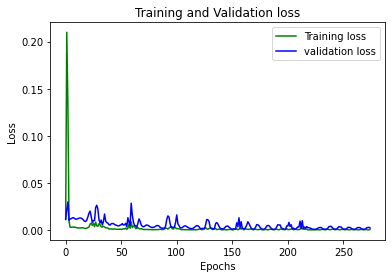

In [ ]:
plt.plot(loss_values, 'g', label='Training loss')
plt.plot(val_loss_values, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
def unscale(data, min_value, max_value):
    return data * (max_value - min_value) + min_value

In [ ]:
predictions = rnn_model.predict(X_test_seq)

6/6 [==============================] - 0s 4ms/step


In [ ]:
# Get the minimum and maximum values from the original data
min_value = df['Stock'].values.min()
max_value = df['Stock'].values.max()

unscaled_pred = unscale(predictions, min_value, max_value)
y_test = unscale(y_test_seq, min_value, max_value)

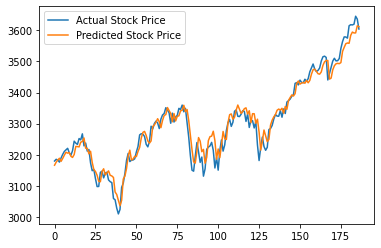

In [ ]:
# Plot the predicted versus actual stock price
plt.plot(y_test, label="Actual Stock Price")
plt.plot(unscaled_pred, label="Predicted Stock Price")
plt.legend()
plt.show()

In [ ]:
# Metrics
mse = mean_squared_error(y_test, unscaled_pred)
r2 = r2_score(y_test, unscaled_pred)

# calculate absolute percentage error
ape = np.abs((y_test - unscaled_pred) / y_test)
# calculate median absolute percentage error
percentile = np.percentile(ape, 50)
print("Mean Squared Error: ", np.round(mse,2))
print("R2 Score: ", np.round(r2,2))
print("Percentile: ",np.round(percentile,3) )

Mean Squared Error:  849.7
R2 Score:  0.95
Percentile:  0.037


### Post (complete by Monday 13/02/23)

Post your solution to Tasks 1-4 in notebook form. If you have not completed all the tasks then that is acceptable. The purpose is to get feedback from others in the group, so if you have only a basic outline then you may get ideas about how to proceed and also examples from others in your group.

No posts should reference Task 5.

### Respond (complete by Wednesday 15/02/23)

If you feel you can provide useful advise then respond to another member of the group through the appropriate forum. Responses should be respectful and offer some sort of advise. Try and avoid clogging the forums with support or thank you messages.

In reviewing others code you will discover different ways to tackle the same problem. It is acceptable to copy parts of others code. However whole scale copying from another notebook is not acceptable.

Grading guidelines for the forum posts: Weight [2/7]

**Beginning [0-8]:** Respectful posts of minor value. Significant number of posts without valuable contributions and/or without well-considered questions. Posts about task 5 in contravention of instructions.

**Developing [9-12]:** At least 1 post  exceeding Beginning level with respectful suggestion or thought provoking question. Most posts contain valuable contributions or well-considered questions.

**Advancing [13-16]:** At least 2 posts: equal to or exceeding Beginning level;  with respectful and sound contribution highlighting mistakes or alternative approaches.

**Accomplished [17-20]:** At least 3 posts: equal to or exceeding Accomplished level; with respectful contribution of significant value. 

<a id='part2'></a>
## Sentiment Analysis


This task is a individual task and should **not** to be uploaded to GitHub. No direct support should be given via the forums, although comments about progress or results are allowed. Marks will be deducted if the instructions are not followed (see rubrics). This part should be uploaded directly to Sulis.

### Context

You have a model that predicts the sentiment of a film review (positive or negative) from the IMDB. There are two hyperparameters that format the data from IMDB: the maximum review length and the dictionary size. Below is a RNN model that predicts sentiment values. 


### Task 5:  (completed by Sunday 19/02/23)

Keeping top_words, max_review_lenngth and the embedding_vector_length the same, change the model so that it uses attention only, i.e. there are no recurrent components. The only Keras layers (defined here https://www.tensorflow.org/api_docs/python/tf/keras/layers) that you allowed to use are:
- Input,
- Embedding, 
- Dense, 
- Any Attention (must be at leat one),
- TimeDistributed,
- Any Merging,
- Any Reshaping,
- Any Pooling,
- Dropout. 

You need not use any of the layers (except attention) but you can use some more than once. Can you do at least as good as the RNN example?

**NB** There are many examples of using attention for sentiment analysis but we looking to see if you can construct a sensible model. The model will be delibrately restricted, so do not waste too much time achieving spectacular accuracy. Remember the rules of thumb that we discussed in the Introduction to DL module.


In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import plot_model

import matplotlib.pyplot as plt
import numpy as np

top_words = 100
(Rev_train, Sc_train), (Rev_test, Sc_test) = imdb.load_data(num_words=top_words)

max_review_length = 500
X_train = sequence.pad_sequences(Rev_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(Rev_test, maxlen=max_review_length)
print(X_train.shape)

17464789/17464789 [==============================] - 2s 0us/step
(25000, 500)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 500)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 500, 16)      1600        ['input_2[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 500, 16)      0           ['embedding[0][0]']              
                                                                                                  
 lstm (LSTM)                    (None, 500, 10)      1080        ['dropout[0][0]']                
                                                                                              

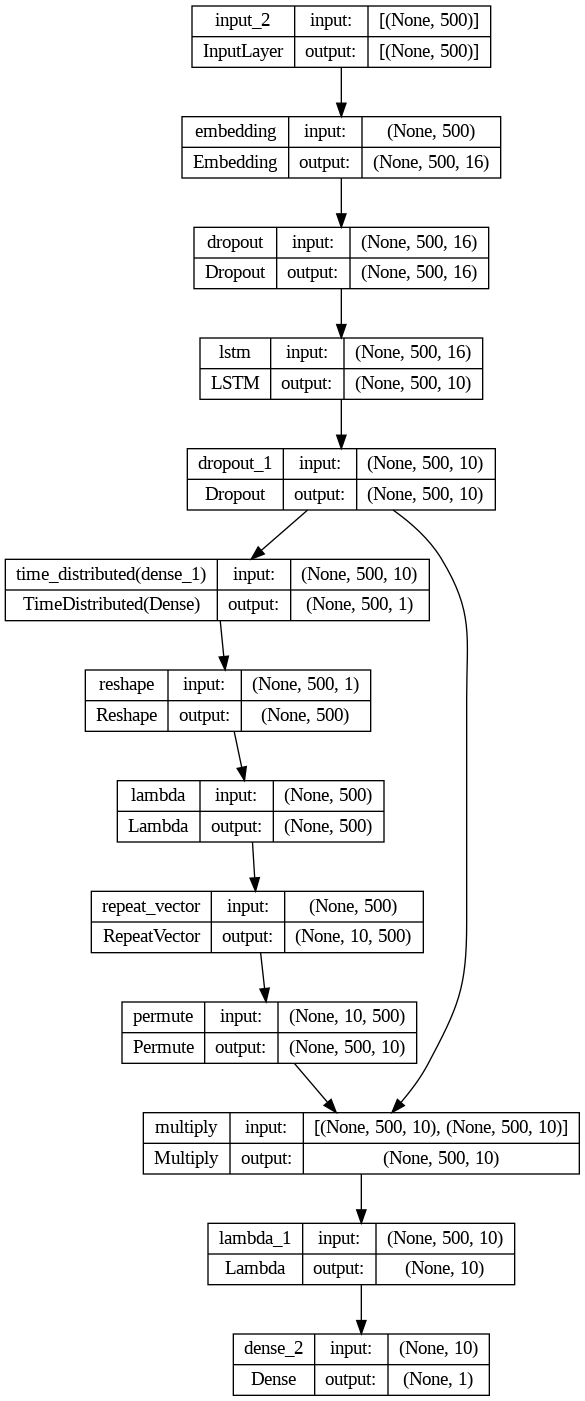

In [ ]:
from keras.layers import Input, Embedding, Dense, Dropout, LSTM, TimeDistributed, Reshape, Lambda, RepeatVector, Permute, multiply
from keras.models import Model
from keras.activations import softmax
from keras import backend as K



# Define the model architecture
#The following is the original code converted to Keras api
embedding_vector_length = 16
inputs = Input(shape=(max_review_length,))
embeddings = Embedding(top_words, embedding_vector_length, input_length=max_review_length)(inputs)
dropout_emb = Dropout(0.2)(embeddings)
lstm = LSTM(10, return_sequences=True)(dropout_emb)
dropout_lstm = Dropout(0.2)(lstm)

#The additional attention layer
#calculate the attention weights for each timestep
attention = TimeDistributed(Dense(1))(dropout_lstm)
attention = Reshape((max_review_length,))(attention)

# Calculate Probability distribution
attention = Lambda(lambda x: softmax(x))(attention)
# repeat the attention vector across each timestep
attention = RepeatVector(10)(attention)
attention = Permute([2, 1])(attention)

#sum the weighted LSTM outputs along the timesteps axis
sent_representation = multiply([dropout_lstm, attention])
sent_representation = Lambda(lambda xin: K.sum(xin, axis=-2))(sent_representation)

#Return a single value 0-1
output = Dense(1, activation='sigmoid')(sent_representation)
model = Model(inputs=inputs, outputs=output)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
plot_model(model, show_shapes=True)


The history for the model above has been saved, as it takes a while to run. If you want to run it yourself then comment out the second line.


In [ ]:
nepoch = 150
IMDB_history = model.fit(X_train,Sc_train,validation_data=(X_test,Sc_test),epochs=nepoch,batch_size=256,callbacks=[EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)])
# IMDB_history=np.load('IMDBTrainhist.npy',allow_pickle='TRUE').item()


Epoch 1/150
98/98 [==============================] - 8s 35ms/step - loss: 0.6903 - accuracy: 0.5263 - val_loss: 0.6789 - val_accuracy: 0.5815
Epoch 2/150
98/98 [==============================] - 3s 29ms/step - loss: 0.6680 - accuracy: 0.5977 - val_loss: 0.6584 - val_accuracy: 0.6368
Epoch 3/150
98/98 [==============================] - 3s 29ms/step - loss: 0.6407 - accuracy: 0.6473 - val_loss: 0.6320 - val_accuracy: 0.6624
Epoch 4/150
98/98 [==============================] - 3s 29ms/step - loss: 0.6140 - accuracy: 0.6720 - val_loss: 0.6018 - val_accuracy: 0.6785
Epoch 5/150
98/98 [==============================] - 3s 30ms/step - loss: 0.5845 - accuracy: 0.6915 - val_loss: 0.5761 - val_accuracy: 0.7045
Epoch 6/150
98/98 [==============================] - 3s 31ms/step - loss: 0.5687 - accuracy: 0.7055 - val_loss: 0.5618 - val_accuracy: 0.7101
Epoch 7/150
98/98 [==============================] - 3s 31ms/step - loss: 0.5598 - accuracy: 0.7130 - val_loss: 0.5561 - val_accuracy: 0.7154
Epoch 

[]

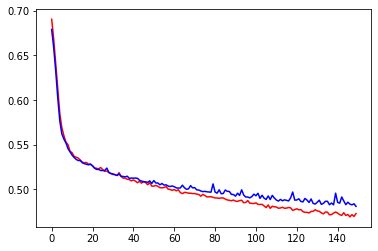

In [ ]:
plt.plot(range(nepoch),IMDB_history.history['loss'],c='r')
plt.plot(range(nepoch),IMDB_history.history['val_loss'],c='b')
plt.plot()

[]

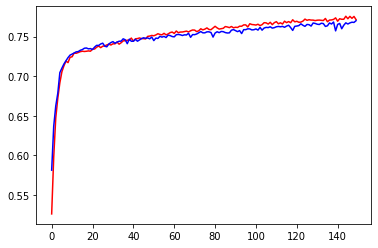

In [ ]:
plt.plot(range(nepoch),IMDB_history.history['accuracy'],c='r')
plt.plot(range(nepoch),IMDB_history.history['val_accuracy'],c='b')
plt.plot()

### Final Submission (complete by Sunday 19/02/23)

Submit Tasks 1-5 in a single notebook this before the deadline on Sunday.


In [ ]:
## Add additional code cells to implememt the tasks stated above

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, Sc_test)
print("Accuracy: ", test_accuracy)

782/782 [==============================] - 7s 9ms/step - loss: 0.4808 - accuracy: 0.7700
Accuracy:  0.7699599862098694


## Reflection

There are no specific marks allocated for a reflection. However due consideration will be given if pertinent comments or valuable insights are made.

## Part1 <br>
**Data processing** <br>
Changed the dates to an int64.<br>
There was a negative correlation between Stock and EuroToDollar.
<br>Deleted this. Overall improvement was found. r2 score improved from .<br>70-.90 range depending on run to > .9
<br>
Missing values filled in using linear interplote this averages the value
<br> before and after the target. This helps retain the time sequence of <br>the data rather than deleting them, even though they is very little.
<br>
<br>
<br>When using more layers other than the single hidden layer for the RNN <br>the model worsened massively. Another simpleRNN layer was tried, a <br>mixture of Dense layers and dropouts, but 1 single layer worked best.

<br> A additive attention mechanism was used for the imdb model.
<br> Attention weights calculated using the TimeDistributed layer.
<br> this is passed through a softmax to get the probability distribution.
<br> These are then used as the representation of the input sequence.
<br> No signficant improvement on the model performance.

